# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
!pip install citipy

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
from api_keys import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid=628b09e431e88f880a119ca16961f747&units={units}&q="
city = cities[3]
response = requests.get(query_url + city).json()

print(f'Beginning Data Retrieval')
print(f'------------------------')
weather_table = pd.DataFrame([])
city_number = 1
total_cities = len(cities)
for i, city in enumerate(cities):
    response = requests.get(query_url + city).json()
    print(f'Getting data of city {city_number} of {total_cities}: {city}')
    city_number += 1
    #Utilized JSON_Normalize to flatten response and draw out columns needed for each city. 
    try:
        weather = pd.json_normalize(response)[['name','dt','coord.lon','coord.lat', 'main.temp_max','main.humidity','wind.speed','clouds.all','sys.country']]
        weather.rename(columns={'name':'City Name','dt':'Date','coord.lon':'Long','coord.lat':'Lat','main.temp_max':'Temp','sys.country':'Country','main.humidity':'Humid','wind.speed':'Wind','clouds.all':'clouds'}, inplace=True)
        weather_table = weather_table.append(weather,ignore_index=True)
    except:
        print(f'{city} does not have complete data, skipping')
        pass
print(f'-----------------------')
print(f'Data Retrieval Complete')
print(f'-----------------------')




Beginning Data Retrieval
------------------------
Getting data of city 1 of 598: busselton
Getting data of city 2 of 598: kapaa
Getting data of city 3 of 598: san carlos de bariloche
Getting data of city 4 of 598: atuona
Getting data of city 5 of 598: half moon bay
Getting data of city 6 of 598: luwuk
Getting data of city 7 of 598: rikitea
Getting data of city 8 of 598: pangnirtung
Getting data of city 9 of 598: ushuaia
Getting data of city 10 of 598: chipinge
Getting data of city 11 of 598: portland
Getting data of city 12 of 598: norman wells
Getting data of city 13 of 598: albany
Getting data of city 14 of 598: hilo
Getting data of city 15 of 598: jaciara
Getting data of city 16 of 598: kaeo
Getting data of city 17 of 598: bluff
Getting data of city 18 of 598: arraial do cabo
Getting data of city 19 of 598: asenovgrad
Getting data of city 20 of 598: talnakh
Getting data of city 21 of 598: esperance
Getting data of city 22 of 598: road town
Getting data of city 23 of 598: deh rawud
d

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
weather_table.to_csv('output_data/weather_table.csv', index = "City ID")
weather_table



,City Name,Date,Long,Lat,Temp,Humid,Wind,clouds,Country
0,Busselton,1611787137,115.3333,-33.6500,60.22,76,11.50,0,AU
1,Kapaa,1611787137,-159.3190,22.0752,77.00,59,8.01,89,US
2,Bariloche,1611786708,-71.3082,-41.1456,53.60,66,31.07,40,AR
3,Atuona,1611787137,-139.0333,-9.8000,78.58,80,15.70,3,PF
4,Half Moon Bay,1611787049,-122.4286,37.4636,51.01,93,12.66,90,US
...,...,...,...,...,...,...,...,...,...
539,Kasongo-Lunda,1611786990,16.8167,-6.4667,69.66,94,2.37,98,CD
540,Camacha,1611787256,-16.3333,33.0833,62.60,94,12.66,75,PT
541,Northam,1611786991,-4.2167,51.0333,52.00,98,7.00,100,GB
542,Eirunepé,1611786991,-69.8736,-6.6603,77.45,93,1.77,78,BR


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
#create easy access to information needed for plotting 
temp = weather_table['Temp'] 
humid = weather_table['Humid'] 
clouds = weather_table['clouds'] 
wind = weather_table['Wind'] 
lat = weather_table['Lat'] 
lng = weather_table['Long']

In [17]:
#  Get the indices of cities that have humidity over 100%.
weather_table.describe()

,Date,Long,Lat,Temp,Humid,Wind,clouds
count,5.440000e+02,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000
mean,1.611787e+09,17.116381,19.878551,47.901471,74.018382,8.390570,55.917279
std,1.586787e+02,90.378617,33.424778,32.971515,18.539084,6.066859,39.608147
min,1.611786e+09,-175.200000,-54.800000,-48.910000,10.000000,0.200000,0.000000
25%,1.611787e+09,-63.664650,-9.692525,28.400000,65.000000,3.647500,9.750000
50%,1.611787e+09,19.175600,25.816650,58.540000,78.000000,6.910000,75.000000
75%,1.611787e+09,96.154175,47.439725,75.200000,87.000000,11.500000,90.000000
max,1.611787e+09,179.316700,78.218600,94.890000,100.000000,35.680000,100.000000


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

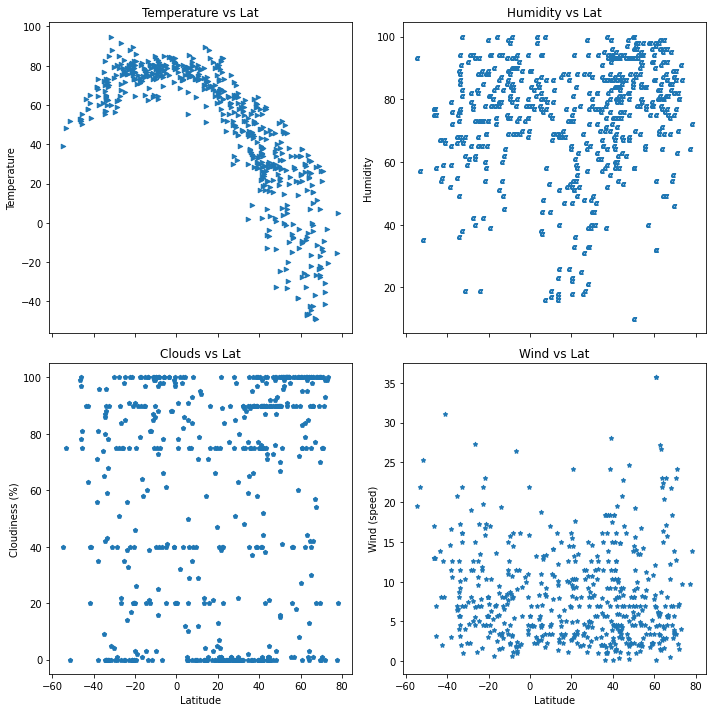

In [26]:
x = lat
z = np.sqrt(clouds**2 + x**2)

#Plot multiple plots on a 2x2 arrangement

fig, axs = plt.subplots(2, 2, sharex=True, sharey=False,figsize=(10,10))

# marker symbol
axs[0, 0].scatter(x, temp, s=20, marker=">")
axs[0, 0].set_title("Temperature vs Lat")
axs[0, 0].set_ylabel("Temperature")

# marker from TeX
axs[0, 1].scatter(x, humid, s=20, marker=r'$\alpha$')
axs[0, 1].set_title('Humidity vs Lat')
axs[0, 1].set_ylabel("Humidity")
# regular polygon marker
axs[1, 0].scatter(x, clouds, s=20, marker=(5, 0))
axs[1, 0].set_title("Clouds vs Lat")
axs[1, 0].set_ylabel("Cloudiness (%)")
axs[1, 0].set_xlabel("Latitude")
# regular star marker
axs[1, 1].scatter(x, wind, s=20, marker=(5, 1))
axs[1, 1].set_title("Wind vs Lat")
axs[1, 1].set_ylabel("Wind (speed)")
axs[1, 1].set_xlabel("Latitude")

plt.tight_layout()


## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

In [28]:
#saving variables for use in following plots.
northern_weather = weather_table[weather_table['Lat'] >= 0]
southern_weather = weather_table[weather_table['Lat'] < 0]
n_temp = northern_weather['Temp']
n_humid = northern_weather['Humid']
n_clouds = northern_weather['clouds']
n_wind = northern_weather['Wind']
n_lat = northern_weather['Lat']
n_lng = northern_weather['Long']
s_temp = southern_weather['Temp']
s_humid = southern_weather['Humid']
s_clouds = southern_weather['clouds']
s_wind = southern_weather['Wind']
s_lat = southern_weather['Lat']
s_lng = southern_weather['Long']


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

the r-value is 0.7040950582858405


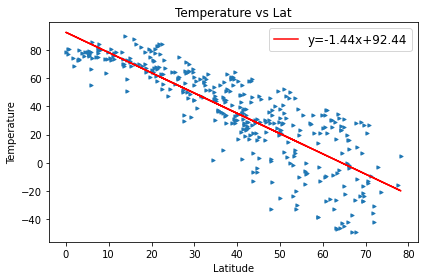

In [29]:
y=n_temp
x=n_lat
slope, intercept, r_value, p_value, std_err = linregress(x,y)
plt.scatter(x, y, s=10, marker=">")
line = slope*x+intercept
print(f'the r-value is {r_value**2}')
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title("Temperature vs Lat")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.legend(fontsize=12)
plt.tight_layout()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

the r-value is 0.4020287649505347


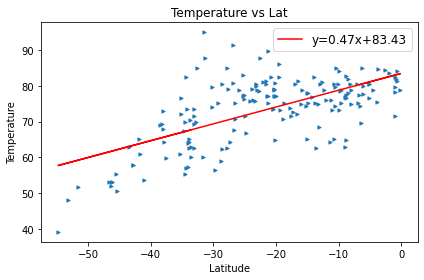

In [30]:
y=s_temp
x=s_lat
slope, intercept, r_value, p_value, std_err = linregress(x,y)
plt.scatter(x, y, s=10, marker=">")
line = slope*x+intercept
print(f'the r-value is {r_value**2}')
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title("Temperature vs Lat")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.legend(fontsize=12)
plt.tight_layout()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r-value is 0.09805754478644713


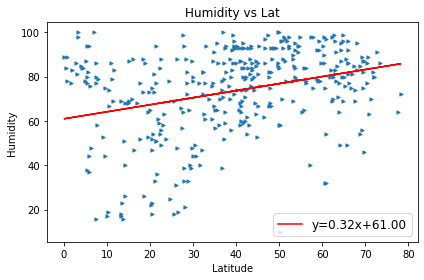

In [31]:
y=n_humid
x=n_lat
slope, intercept, r_value, p_value, std_err = linregress(x,y)
plt.scatter(x, y, s=10, marker=">")
line = slope*x+intercept
print(f'the r-value is {r_value**2}')
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title("Humidity vs Lat")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.legend(fontsize=12)
plt.tight_layout()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r-value is 0.09406806931698107


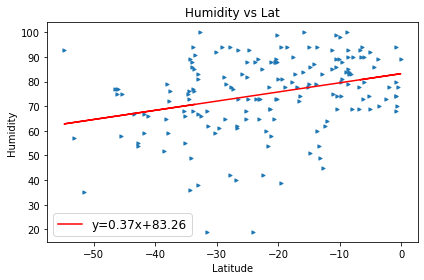

In [32]:
y=s_humid
x=s_lat
slope, intercept, r_value, p_value, std_err = linregress(x,y)
plt.scatter(x, y, s=10, marker=">")
line = slope*x+intercept
print(f'the r-value is {r_value**2}')
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title("Humidity vs Lat")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.legend(fontsize=12)
plt.tight_layout()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r-value is 0.10851648713093476


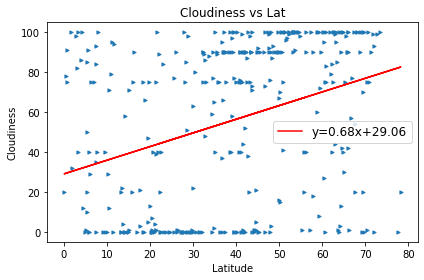

In [33]:
y=n_clouds
x=n_lat
slope, intercept, r_value, p_value, std_err = linregress(x,y)
plt.scatter(x, y, s=10, marker=">")
line = slope*x+intercept
print(f'the r-value is {r_value**2}')
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title("Cloudiness vs Lat")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.legend(fontsize=12)
plt.tight_layout()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r-value is 0.025234237884519294


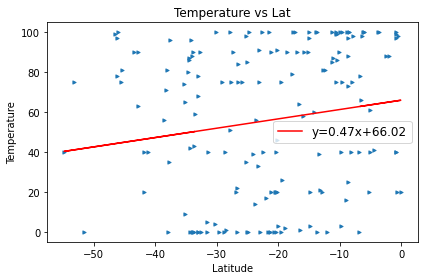

In [34]:
y=s_clouds
x=s_lat
slope, intercept, r_value, p_value, std_err = linregress(x,y)
plt.scatter(x, y, s=10, marker=">")
line = slope*x+intercept
print(f'the r-value is {r_value**2}')
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title("Temperature vs Lat")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.legend(fontsize=12)
plt.tight_layout()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r-value is 0.006236776048929023


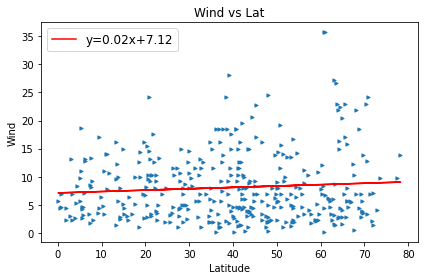

In [36]:
y=n_wind
x=n_lat
slope, intercept, r_value, p_value, std_err = linregress(x,y)
plt.scatter(x, y, s=10, marker=">")
line = slope*x+intercept
print(f'the r-value is {r_value**2}')
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title("Wind vs Lat")
plt.ylabel("Wind")
plt.xlabel("Latitude")
plt.legend(fontsize=12)
plt.tight_layout()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r-value is 0.06931211216729362


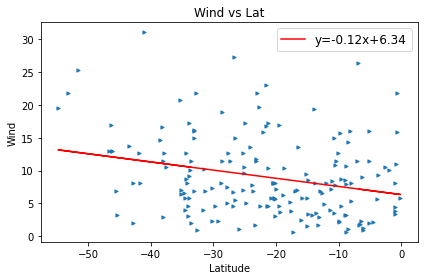

In [37]:
y=s_wind
x=s_lat
slope, intercept, r_value, p_value, std_err = linregress(x,y)
plt.scatter(x, y, s=10, marker=">")
line = slope*x+intercept
print(f'the r-value is {r_value**2}')
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.title("Wind vs Lat")
plt.ylabel("Wind")
plt.xlabel("Latitude")
plt.legend(fontsize=12)
plt.tight_layout()
